# ISY5002 PSUPR/PRMLS CA1
## Data set is sourced from https://archive.ics.uci.edu/ml/datasets/Dota2+Games+Results
## Data set label for column 5 onward are from https://github.com/kronusme/dota2-api/blob/master/data/heroes.json

The objectives is to predict if a game will win given the type of heroes picked by both teams from a pool of 113 possible heroes to choose from.
The "Won" column denotes the whether the team won (value of 1) or if the opposition team won (value of -1)
Column 5 onwards represent the heroes that could be picked, each team will pick 5 heroes with value of 1 representing hero picked by the team and value of -1 for heroes picked by the opposition team. Value of zero represents heroes not picked by either teams.

##### Import dependencies

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.svm import SVC
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn import metrics

##### Read dataset from csv

In [26]:
raw_data_train = pd.read_csv('..\dataset\dota2Train.csv')
raw_data_test = pd.read_csv('..\dataset\dota2Test.csv')

In [28]:
raw_data_train.head()

,Won,Cluster ID,Game Mode,Game Type,Anti-Mage,Axe,Bane,Bloodseeker,Crystal Maiden,Drow Ranger,...,Legion Commander,Techies,Ember Spirit,Earth Spirit,Abyssal Underlord,Terrorblade,Phoenix,Oracle,Winter Wyvern,Arc Warden
0,-1,223,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,152,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,131,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
3,1,154,2,2,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
4,-1,171,2,3,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0


##### Drop label columns and other non-relevent column

In [29]:
x_train = raw_data_train.drop(["Won", "Cluster ID", "Game Mode", "Game Type"], axis=1)
y_train = raw_data_train["Won"]
x_test = raw_data_test.drop(["Won", "Cluster ID", "Game Mode", "Game Type"], axis=1)
y_test = raw_data_test["Won"]

In [30]:
x_train.head()

,Anti-Mage,Axe,Bane,Bloodseeker,Crystal Maiden,Drow Ranger,Earthshaker,Juggernaut,Mirana,Shadow Fiend,...,Legion Commander,Techies,Ember Spirit,Earth Spirit,Abyssal Underlord,Terrorblade,Phoenix,Oracle,Winter Wyvern,Arc Warden
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,-1,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,-1,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
y_train.head()

0   -1
1    1
2    1
3    1
4   -1
Name: Won, dtype: int64

In [32]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92650 entries, 0 to 92649
Columns: 113 entries, Anti-Mage to Arc Warden
dtypes: int64(113)
memory usage: 79.9 MB


In [33]:
x_train.describe()

,Anti-Mage,Axe,Bane,Bloodseeker,Crystal Maiden,Drow Ranger,Earthshaker,Juggernaut,Mirana,Shadow Fiend,...,Legion Commander,Techies,Ember Spirit,Earth Spirit,Abyssal Underlord,Terrorblade,Phoenix,Oracle,Winter Wyvern,Arc Warden
count,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000,...,92650.000000,92650.000000,92650.000000,92650.000000,92650.0,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000
mean,-0.001630,-0.000971,0.000691,-0.000799,-0.002008,0.003173,-0.000345,-0.003832,0.005979,0.001543,...,-0.001371,-0.000950,0.000885,0.000594,0.0,0.001025,0.000648,-0.000227,-0.000043,0.000896
std,0.402004,0.467672,0.165052,0.355393,0.329348,0.483950,0.348865,0.501760,0.588109,0.325344,...,0.535024,0.206112,0.283985,0.155940,0.0,0.220703,0.204166,0.168707,0.189868,0.139033
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


### 1st Attempt with SCM

Build a model using basic linear SVC to see results

In [44]:
svc = SVC(random_state=42, C=1.0, max_iter=500, verbose=2, gamma='auto', probability=True)
svc.fit(x_train, y_train)

[LibSVM]

C:\ProgramData\Anaconda3\envs\psuprca1\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=500, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=2)

##### Prediction and show metrics

In [47]:
y_pred = svc.predict(x_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[2523 2269]
 [2859 2643]]
              precision    recall  f1-score   support

          -1       0.47      0.53      0.50      4792
           1       0.54      0.48      0.51      5502

    accuracy                           0.50     10294
   macro avg       0.50      0.50      0.50     10294
weighted avg       0.51      0.50      0.50     10294



In [48]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.5018457353798329


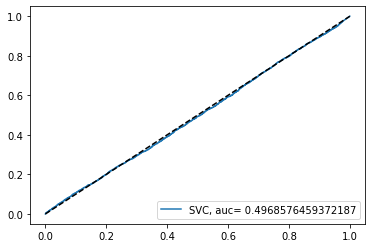

In [52]:
y_pred_proba = svc.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="SVC, auc= " + str(auc))
plt.plot([0,1],[0,1],'k--')
plt.legend(loc=4)
plt.show()

### 1st attempt summary

Using a simple SVM classifier on the dataset, it is clear the attempt does not work well as the accuracy is only 50% which is as good as random.

### 2nd attempt

As dataset have alot of zeros value or sparse data, we will try to normalize the data before training again.

In [67]:
x_train_norm = Normalizer().fit_transform(x_train)
print(x_train_norm)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.         -0.31622777  0.         ...  0.          0.
   0.        ]]


In [68]:
svc_norm = svc.fit(x_train_norm, y_train)

[LibSVM]

C:\ProgramData\Anaconda3\envs\psuprca1\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [69]:
y_pred = svc.predict(x_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[2053 2739]
 [2316 3186]]
              precision    recall  f1-score   support

          -1       0.47      0.43      0.45      4792
           1       0.54      0.58      0.56      5502

    accuracy                           0.51     10294
   macro avg       0.50      0.50      0.50     10294
weighted avg       0.51      0.51      0.51     10294



In [70]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.5089372449970857


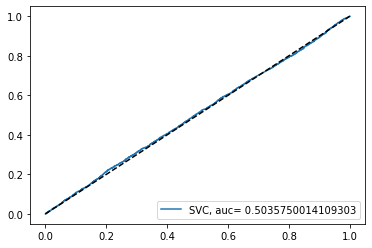

In [71]:
y_pred_proba = svc.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="SVC, auc= " + str(auc))
plt.plot([0,1],[0,1],'k--')
plt.legend(loc=4)
plt.show()

### 2nd attempt summary

Results is still not improved with normalization preprocessing, accuracy remains poor at 50%

### 3rd attempt

Tune the hyper parameter with grid search